In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
from sklearn import linear_model as lm
import matplotlib.pylab as pylab
import matplotlib.pyplot as plt
import classification as lg
import digit_class as digits
#import digits_function as digitsfunc
from datetime import datetime
import time
from sklearn import svm, ensemble

In [3]:
###### Load Data #################

train_x, train_y = digits.load_digits("/Users/xinw/Documents/projects/velox-centipede/data", digits_filename = "mnist_train.csv")
Z = digits.normalize_digits(train_x)
test_x, test_y = digits.load_digits("/Users/xinw/Documents/projects/velox-centipede/data", digits_filename = "mnist_test.csv")
test_Z = digits.normalize_digits(test_x)
#Z = digits.fourier_project(train_x)


Source file: /Users/xinw/Documents/projects/velox-centipede/data/mnist_train.csv
Number of image files: 60000
Source file: /Users/xinw/Documents/projects/velox-centipede/data/mnist_test.csv
Number of image files: 10000


In [3]:
### Partial Concept Drift 

####### Initialization ##########
tasks = digits.create_mtl_datasets(Z, train_y, nTasks=100, taskSize=20, testSize=40)
#xs,ys,dy,ss,test_xs,test_ys,test_dy,test_ts = digits.generate_data(tasks)
xs = []
ys = []
dy = []
ss = []
k = 20
k_svm = 10
train_iter = 2


In [ ]:
ntask = 20
## Strategy: Train All data
oracle_train_all_errors = []
oracle_train_all = lg.LgSegmentModel(xs,ys,ss,'train-all',k) 
svm_train_all = lg.UserDefineModel(xs,ys,dy,ss,'train-all') # using the default value 
test_xs,test_ys,test_ss = digits.generate_additional_data (tasks, oracle_train_all, svm_train_all,3)
"""
for j in range(train_iter):
    oracle_train_all.train_all_fs()
    oracle_train_all.train_ws()
oracle_err = lg.seg_model_error_01(oracle_train_all, test_xs, test_ys, test_ss, num=20)
oracle_train_all_errors.append(oracle_err)
#oracle_mtl_errors.append(oracle_err)
print "Initial Error OracleMTL---Train All: %f" % oracle_err
"""
svm_train_all.train_all_fs()
svm_train_all.train_ws()
svm_err = lg.seg_model_error_01(svm_train_all,test_xs,test_ys,test_ss)
print 'Initial Error SVM_mtl---Train All: ', svm_err
svm_train_all_errors = []


## strategy: retrain-new
oracle_retrain_new_errors = []
oracle_retrain_new = lg.LgSegmentModel(xs,ys,ss,'train-all',k)
svm_retrain_new = lg.UserDefineModel(xs,ys,dy,ss,'train-all') # using the default value 
test_xs,test_ys,test_ss = digits.generate_additional_data (tasks, oracle_retrain_new, svm_retrain_new,3)
"""
for j in range(train_iter):
    oracle_retrain_new.train_all_fs()
    oracle_retrain_new.train_ws()
oracle_retrain_new.strategy = 'retrain-new'    
"""
svm_retrain_new.train_all_fs()
svm_retrain_new.train_ws()
svm_retrain_new_errors = []
svm_retrain_new.strategy = 'retrain-new'
"""
oracle_err = lg.seg_model_error_01(oracle_retrain_new, test_xs, test_ys, test_ss, num=20)
oracle_retrain_new_errors.append(oracle_err)
"""
svm_err = lg.seg_model_error_01(svm_retrain_new,test_xs,test_ys,test_ss)
#svm_retrain_new_errors.append(svm_err)
#print "Initial Error OracleMTL---Train All: %f" % oracle_err
print 'Initial Error SVM_mtl---Train All: ', svm_err



## strategy: average-weight
oracle_average_weight_errors = []
oracle_average_weight = lg.LgSegmentModel(xs,ys,ss,'train-all',k) 
svm_average_weight = lg.UserDefineModel(xs,ys,dy,ss,'train-all') # using the default value 
test_xs,test_ys,test_ss = digits.generate_additional_data (tasks, oracle_average_weight, svm_average_weight,3)
"""
for j in range(train_iter):
    oracle_average_weight.train_all_fs()
    oracle_average_weight.train_ws()
oracle_average_weight.strategy = 'average-weight'    
"""
svm_average_weight.train_all_fs()
svm_average_weight.train_ws()
svm_average_weight_errors = []
svm_average_weight.strategy = 'average-weight'
"""
oracle_err = lg.seg_model_error_01(oracle_average_weight, test_xs, test_ys, test_ss, num=20)
oracle_retrain_new_errors.append(oracle_err)
"""
svm_err = lg.seg_model_error_01(svm_average_weight,test_xs,test_ys,test_ss)
#svm_average_weight_errors.append(svm_err)
#print "Initial Error OracleMTL---Train All: %f" % oracle_err
print 'Initial Error SVM_mtl---Train All: ', svm_err

## strategy: last-point
oracle_last_point_errors = []
oracle_last_point = lg.LgSegmentModel(xs,ys,ss,'train-all',k)
svm_last_point = lg.UserDefineModel(xs,ys,dy,ss,'train-all') # using the default value 
test_xs,test_ys,test_ss = digits.generate_additional_data (tasks, oracle_last_point, svm_last_point,3)
print len(test_ss)
"""
for j in range(train_iter):
    oracle_last_point.train_all_fs()
    oracle_last_point.train_ws()
oracle_last_point.strategy = 'last-point'    
"""
svm_last_point.train_all_fs()
svm_last_point.train_ws()
svm_last_point_errors = []
svm_last_point.strategy = 'last-point'

"""
oracle_err = lg.seg_model_error_01(oracle_last_point, test_xs, test_ys, test_ss, num=20)
oracle_retrain_new_errors.append(oracle_err)
"""
svm_err = lg.seg_model_error_01(svm_last_point,test_xs,test_ys,test_ss)
#svm_last_point_errors.append(svm_err)
#print "Initial Error OracleMTL---Train All: %f" % oracle_err
print 'Initial Error SVM_mtl---Train All: ', svm_err


## strategy: Gradient-step
oracle_gradient_step_errors = []
oracle_gradient_step = lg.LgSegmentModel(xs,ys,ss,'train-all',k)
svm_gradient_step = lg.UserDefineModel(xs,ys,dy,ss,'train-all') # using the default value 
test_xs,test_ys,test_ss = digits.generate_additional_data (tasks, oracle_gradient_step, svm_gradient_step,3)
"""
for j in range(train_iter):
    oracle_gradient_step.train_all_fs()
    oracle_gradient_step.train_ws()
oracle_gradient_step.strategy = 'Gradient-step'    
"""

svm_gradient_step.train_all_fs()
svm_gradient_step.train_ws()
svm_gradient_step_errors = []
svm_gradient_step.strategy = 'Gradient-step'

"""
oracle_err = lg.seg_model_error_01(oracle_gradient_step, test_xs, test_ys, test_ss, num=20)
oracle_retrain_new_errors.append(oracle_err)
"""
svm_err = lg.seg_model_error_01(svm_gradient_step,test_xs,test_ys,test_ss)
#svm_gradient_step_errors.append(svm_err)
#print "Initial Error OracleMTL---Train All: %f" % oracle_err
print 'Initial Error SVM_mtl---Train All: ', svm_err

print '\n\n Finish Initialization!'


TOTALS: fit time: 12.055393
start training ws!
ws: feature_time (s): 0.044092, train_time (s): 0.024299
Initial Error SVM_mtl---Train All:  0.1135
TOTALS: fit time: 22.912378
start training ws!
ws: feature_time (s): 0.102453, train_time (s): 0.041574

In [6]:
print len(test_xs)

4000


In [7]:
test_xa = list(test_xs)
test_ya = list(test_ys)
test_ta = list(test_ss)

In [53]:
test_xs1,test_ys1,test_ts1 = digits.generate_data_concept_drift(Z, train_y, oracle_train_all,svm_train_all,i,'partial')
test_xs2,test_ys2,test_ts2 = digits.generate_data_concept_drift(Z, train_y, oracle_retrain_new,svm_retrain_new,i,'partial')
test_xs3,test_ys3,test_ts3 = digits.generate_data_concept_drift(Z, train_y, oracle_average_weight,svm_average_weight,i,'partial')
test_xs4,test_ys4,test_ts4 = digits.generate_data_concept_drift(Z, train_y, oracle_last_point,svm_last_point,i,'partial')
test_xs5,test_ys5,test_ts5 = digits.generate_data_concept_drift(Z, train_y, oracle_gradient_step,svm_gradient_step,i,'partial')


digit_class.py:447: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  perm = np.random.permutation(len(y)) # shuffle dataset


In [56]:
len(svm_train_all.segments[0].ys)

40

In [57]:

####### Update Strategy Experiment #################
# number of points range from 20-200, step = 10


iters = [i+20 for i in range(20)]
for i in iters:
    print 'update-strategy: # of points: ', i
    ## oracle
    """
    oracle_train_all.train_ws()
    oracle_err = lg.seg_model_error_01(oracle_train_all, test_xs, test_ys, test_ts, num=20)
    oracle_train_all_errors.append(oracle_err)
    print 'Testing Error of oracle model-- train-all is ', oracle_err

    oracle_retrain_new.train_ws()
    oracle_err = lg.seg_model_error_01(oracle_retrain_new, test_xs, test_ys, test_ts, num=20)
    oracle_retrain_new_errors.append(oracle_err)
    print 'Testing Error of oracle model-- retrain_new is ', oracle_err

    oracle_average_weight.train_ws()
    oracle_err = lg.seg_model_error_01(oracle_average_weight, test_xs, test_ys, test_ts, num=20)
    oracle_average_weight_errors.append(oracle_err)
    print 'Testing Error of oracle model-- average_weight is ', oracle_err
    
    oracle_last_point.train_ws()
    oracle_err = lg.seg_model_error_01(oracle_last_point, test_xs, test_ys, test_ts, num=20)
    oracle_last_point_errors.append(oracle_err)
    print 'Testing Error of oracle model-- last_point is ', oracle_err
    
    oracle_gradient_step.train_ws()
    oracle_err = lg.seg_model_error_01(oracle_gradient_step, test_xs, test_ys, test_ts, num=20)
    oracle_gradient_step_errors.append(oracle_err)
    print 'Testing Error of oracle model-- gradient_step is ', oracle_err    
    """
    ### svm
    
    svm_train_all.train_ws(i)
    svm_err = lg.seg_model_error_01(svm_train_all, test_xs1, test_ys1, test_ts1)
    svm_train_all_errors.append(svm_err)
    print 'Testing Error of svm model-- train-all is ', svm_err
    
    
    svm_retrain_new.train_ws(i)
    svm_err = lg.seg_model_error_01(svm_retrain_new, test_xs2, test_ys2, test_ts2)
    svm_retrain_new_errors.append(svm_err)
    print 'Testing Error of svm model-- retrain_new is ', svm_err
    
    
    svm_average_weight.train_ws(i)
    svm_err = lg.seg_model_error_01(svm_average_weight, test_xs3, test_ys3, test_ts3)
    svm_average_weight_errors.append(svm_err)
    print 'Testing Error of svm model-- average_weight is ', svm_err
    
    svm_last_point.train_ws(i)
    svm_err = lg.seg_model_error_01(svm_last_point, test_xs4, test_ys4, test_ts4)
    svm_last_point_errors.append(svm_err)
    print 'Testing Error of svm model-- last_point is ', svm_err
    
    
    svm_gradient_step.train_ws(i)
    svm_err = lg.seg_model_error_01(svm_gradient_step, test_xs5, test_ys5, test_ts5)
    svm_gradient_step_errors.append(svm_err)
    print 'Testing Error of svm model-- gradient_step is ', svm_err  

 

update-strategy: # of points:  20
start training ws!
ws: feature_time (s): 0.119688, train_time (s): 0.053971
Testing Error of svm model-- train-all is  0.22125
start training ws!
ws: feature_time (s): 0.146294, train_time (s): 0.043099
Testing Error of svm model-- retrain_new is  0.52375
start training ws!
ws: feature_time (s): 0.197951, train_time (s): 0.048806
Testing Error of svm model-- average_weight is  0.4965
start training ws!
ws: feature_time (s): 0.198691, train_time (s): 0.003562
Testing Error of svm model-- last_point is  0.48725
start training ws!
ws: feature_time (s): 0.234908, train_time (s): 0.005531
Testing Error of svm model-- gradient_step is  0.49825
update-strategy: # of points:  21
start training ws!
ws: feature_time (s): 0.146569, train_time (s): 0.057529
Testing Error of svm model-- train-all is  0.22125
start training ws!
ws: feature_time (s): 0.173383, train_time (s): 0.046046
Testing Error of svm model-- retrain_new is  0.52375
start training ws!
ws: feature

In [58]:
iters = [20]+iters

In [14]:
print iters

[20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]


In [22]:
print len(iters)
del svm_retrain_new_errors[1]
del svm_retrain_new_errors[2]
del svm_retrain_new_errors[3]
print len(svm_retrain_new_errors)

31
31


In [416]:

## Write Files ###

#f = open('update-strategy-experiment-partial-concept-drift.txt','w')
#f = open('update-strategy-experiment-total-concept-drift.txt','w')
#f = open('update-strategy-experiment-stationery-distribution.txt','w')
f = open('stationery-distribution-6lines.txt','w')
f.write('strategy: train-all\n')
"""
f.write('Oracle Model:\n')
f.write('# of points:')
for i in iters:
    f.write('\t'+str(i))
f.write('\n\t')     

for t in oracle_train_all_errors:
    f.write('\t'+str(t))
"""    
f.write('SVM Model:\n# of points:')
for i in iters:
    f.write('\t'+str(i))
f.write('\n')  
for t in svm_train_all_errors:
    f.write('\t'+str(t))
f.write('\n\n')

f.write('strategy: retrain_new\n')
"""
f.write('Oracle Model:\n')
f.write('# of points:')
for i in iters:
    f.write('\t'+str(i))
f.write('\n\t')     

for t in oracle_retrain_new_errors:
    f.write('\t'+str(t))
"""
    
f.write('SVM Model:\n# of points:')
for i in iters:
    f.write('\t'+str(i))
f.write('\n')  
for t in svm_retrain_new_errors:
    f.write('\t'+str(t))
f.write('\n\n')


f.write('strategy: average_weight\n')

"""
f.write('Oracle Model:\n')
f.write('# of points:')
for i in iters:
    f.write('\t'+str(i))
f.write('\n\t')     

for t in oracle_average_weight_errors:
    f.write('\t'+str(t))
"""    
    
f.write('\n\nSVM Model:\n# of points:')
for i in iters:
    f.write('\t'+str(i))
f.write('\n')  
for t in svm_average_weight_errors:
    f.write('\t'+str(t))
f.write('\n\n')

f.write('strategy: last_point\n')
"""
f.write('Oracle Model:\n')
f.write('# of points:')
for i in iters:
    f.write('\t'+str(i))
f.write('\n\t')     

for t in oracle_last_point_errors:
    f.write('\t'+str(t))
"""    
    
f.write('\n\nSVM Model:\n# of points:')
for i in iters:
    f.write('\t'+str(i))
f.write('\n')  
for t in svm_last_point_errors:
    f.write('\t'+str(t))
f.write('\n\n')

f.write('strategy: gradient_step\n')
"""
f.write('Oracle Model:\n')
f.write('# of points:')
for i in iters:
    f.write('\t'+str(i))
f.write('\n\t')     

for t in oracle_gradient_step_errors:
    f.write('\t'+str(t))
"""    
    
f.write('\n\nSVM Model:\n# of points:')
for i in iters:
    f.write('\t'+str(i))
f.write('\n')  
for t in svm_gradient_step_errors:
    f.write('\t'+str(t))
f.write('\n\n')


f.write('strategy: no retrain:')
f.write('\n\nSVM Model:\n# of points:')
for i in iters:
    f.write('\t'+str(i))
f.write('\n')  
for t in svm_no_retrain_errors:
    f.write('\t'+str(t))
f.write('\n')

f.close()

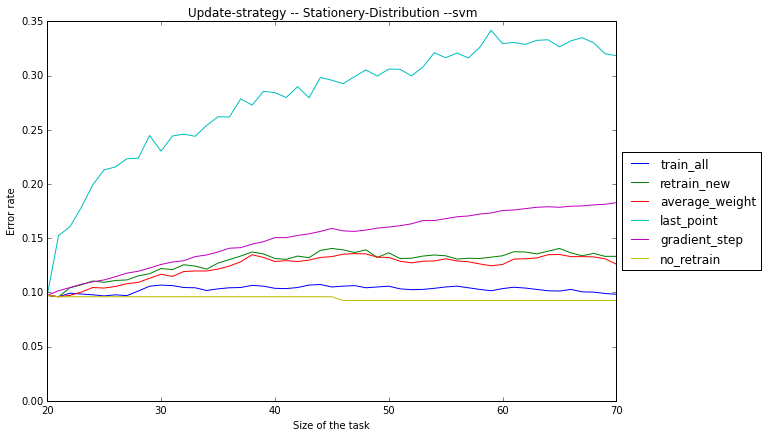

In [415]:
## plot ###
"""
fig,ax = plt.subplots()
#ax.plot(iters, oracle_train_all_errors, label='train_all')
ax.plot(iters, oracle_retrain_new_errors, label = 'retrain_new')
#ax.plot(iters, oracle_average_weight_errors, label = 'average_weight')
#ax.plot(iters, oracle_last_point_errors, label = 'last_point')
#ax.plot(iters, oracle_gradient_step_errors, label = 'gradient_step')
ax.set_xlabel('Size of the task')
ax.set_ylabel('Error rate')
ax.set_title('Update-strategy -- Partial-Concept-Drift --Oracle ')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
default_size = fig.get_size_inches()
size_mult = 1.7
ax.set_ylim((0.0, ax.get_ylim()[1]))
fig.set_size_inches(default_size[0]*size_mult,default_size[1]*size_mult)
plt.show()
"""
fig,ax = plt.subplots()
ax.plot(iters, svm_train_all_errors, label='train_all')
ax.plot(iters, svm_retrain_new_errors, label = 'retrain_new')
ax.plot(iters, svm_average_weight_errors, label = 'average_weight')
ax.plot(iters, svm_last_point_errors, label = 'last_point')
ax.plot(iters, svm_gradient_step_errors, label = 'gradient_step')
ax.plot(iters, svm_no_retrain_errors, label = 'no_retrain')
ax.set_xlabel('Size of the task')
ax.set_ylabel('Error rate')
ax.set_title('Update-strategy -- Stationery-Distribution --svm ')
#ax.set_title('Update-strategy -- Total-Concept-Drift --svm ')
#ax.set_title('Update-strategy -- Parital-Concept-Drift --svm ')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
default_size = fig.get_size_inches()
size_mult = 1.7
ax.set_ylim((0.0, ax.get_ylim()[1]))
fig.set_size_inches(default_size[0]*size_mult,default_size[1]*size_mult)
plt.show()


In [347]:
### Partial Concept Drift 

####### Initialization ##########
tasks = digits.create_mtl_datasets(Z, train_y, nTasks=100, taskSize=20, testSize=40)
#xs,ys,dy,ss,test_xs,test_ys,test_dy,test_ts = digits.generate_data(tasks)
xs = []
ys = []
dy = []
ss = []
k = 20
k_svm = 10
train_iter = 2

In [383]:
tasks = digits.create_mtl_datasets(Z, train_y, nTasks=100, taskSize=20, testSize=40)

# retrain New

In [384]:
### Partial Concept Drift 

####### Initialization ##########
#tasks = digits.create_mtl_datasets(Z, train_y, nTasks=100, taskSize=20, testSize=40)
#xs,ys,dy,ss,test_xs,test_ys,test_dy,test_ts = digits.generate_data(tasks)
xs = []
ys = []
dy = []
ss = []
k = 20
k_svm = 10
train_iter = 2

In [385]:
oracle_retrain_new_errors = []
oracle_retrain_new = lg.LgSegmentModel(xs,ys,ss,'train-all',k)
svm_retrain_new = lg.UserDefineModel(xs,ys,dy,ss,'train-all') # using the default value 
test_xs,test_ys,test_ss = digits.generate_additional_data (tasks, oracle_retrain_new, svm_retrain_new,3)
"""
for j in range(train_iter):
    oracle_retrain_new.train_all_fs()
    oracle_retrain_new.train_ws()
oracle_retrain_new.strategy = 'retrain-new'    
"""
svm_retrain_new.train_all_fs()
svm_retrain_new.train_ws()
svm_retrain_new_errors = []
svm_retrain_new.strategy = 'retrain-new'
"""
oracle_err = lg.seg_model_error_01(oracle_retrain_new, test_xs, test_ys, test_ss, num=20)
oracle_retrain_new_errors.append(oracle_err)
"""
svm_err = lg.seg_model_error_01(svm_retrain_new,test_xs,test_ys,test_ss)
svm_retrain_new_errors.append(svm_err)
#print "Initial Error OracleMTL---Train All: %f" % oracle_err
print 'Initial Error SVM_mtl---Train All: ', svm_err


TOTALS: fit time: 9.950414
start training ws!
ws: feature_time (s): 0.045588, train_time (s): 0.025146
Initial Error SVM_mtl---Train All:  0.09725


In [386]:
test_xss,test_yss,test_tss = digits.generate_data_concept_drift(Z, train_y, oracle_retrain_new,svm_retrain_new,'same')

In [387]:
test_xss1,test_yss1,test_tss1 = digits.generate_data_concept_drift(Z, train_y, oracle_retrain_new,svm_retrain_new,'same')

In [288]:
len(test_xss1)

4000

In [289]:
segment= svm_retrain_new.segments

In [322]:
len(segment[0].xs)

70

In [388]:
for i in range(50):
    i+=20
    print '# of points is', i
    svm_retrain_new.train_ws(i)
    if i<45:
        svm_err = lg.seg_model_error_01(svm_retrain_new,test_xss,test_yss,test_tss)
    else:
        svm_err = lg.seg_model_error_01(svm_retrain_new,test_xss1,test_yss1,test_tss1)
    print svm_err
    svm_retrain_new_errors.append(svm_err)

# of points is 20
start training ws!
ws: feature_time (s): 0.203766, train_time (s): 0.042717
0.096
# of points is 21
start training ws!
ws: feature_time (s): 0.219152, train_time (s): 0.047558
0.10425
# of points is 22
start training ws!
ws: feature_time (s): 0.189709, train_time (s): 0.045680
0.107
# of points is 23
start training ws!
ws: feature_time (s): 0.180614, train_time (s): 0.037424
0.1105
# of points is 24
start training ws!
ws: feature_time (s): 0.185385, train_time (s): 0.040746
0.10925
# of points is 25
start training ws!
ws: feature_time (s): 0.177775, train_time (s): 0.035675
0.111
# of points is 26
start training ws!
ws: feature_time (s): 0.214677, train_time (s): 0.045584
0.1115
# of points is 27
start training ws!
ws: feature_time (s): 0.179499, train_time (s): 0.037830
0.11525
# of points is 28
start training ws!
ws: feature_time (s): 0.296262, train_time (s): 0.070738
0.11725
# of points is 29
start training ws!
ws: feature_time (s): 0.287999, train_time (s): 0.084

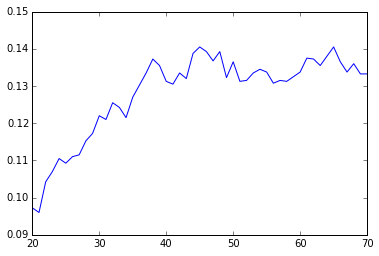

In [389]:
plt.plot(iters,svm_retrain_new_errors)
plt.show()

# Train All

In [390]:
### Partial Concept Drift 

####### Initialization ##########
#tasks = digits.create_mtl_datasets(Z, train_y, nTasks=100, taskSize=20, testSize=40)
#xs,ys,dy,ss,test_xs,test_ys,test_dy,test_ts = digits.generate_data(tasks)
xs = []
ys = []
dy = []
ss = []
k = 20
k_svm = 10
train_iter = 2

In [391]:
oracle_train_all_errors = []
oracle_train_all = lg.LgSegmentModel(xs,ys,ss,'train-all',k) 
svm_train_all = lg.UserDefineModel(xs,ys,dy,ss,'train-all') # using the default value 
test_xs,test_ys,test_ss = digits.generate_additional_data (tasks, oracle_train_all, svm_train_all,3)
"""
for j in range(train_iter):
    oracle_train_all.train_all_fs()
    oracle_train_all.train_ws()
oracle_err = lg.seg_model_error_01(oracle_train_all, test_xs, test_ys, test_ss, num=20)
oracle_train_all_errors.append(oracle_err)
#oracle_mtl_errors.append(oracle_err)
print "Initial Error OracleMTL---Train All: %f" % oracle_err
"""
svm_train_all.train_all_fs()
svm_train_all.train_ws()
svm_err = lg.seg_model_error_01(svm_train_all,test_xs,test_ys,test_ss)
print 'Initial Error SVM_mtl---Train All: ', svm_err
svm_train_all_errors = [svm_err]

TOTALS: fit time: 8.816129
start training ws!
ws: feature_time (s): 0.045411, train_time (s): 0.025392
Initial Error SVM_mtl---Train All:  0.09725


In [252]:
len(svm_train_all.xs)

2000

In [392]:
svm_train_all.xs += svm_retrain_new.xs[2000:]
svm_train_all.ys += svm_retrain_new.ys[2000:]
svm_train_all.ss += svm_retrain_new.ss[2000:]
svm_train_all.digitys += svm_retrain_new.digitys[2000:]
segment = svm_train_all.segments
seg = svm_retrain_new.segments
for s in segment:
    segment[s].xs += seg[s].xs[20:]
    segment[s].ys += seg[s].ys[20:]
    segment[s].pref = seg[s].pref

In [254]:
len(svm_train_all.segments[0].xs)

70

In [105]:
test_xss,test_yss,test_tss = digits.generate_data_concept_drift(Z, train_y, oracle_train_all,svm_train_all,'partial')

In [106]:
test_xss1,test_yss1,test_tss1 = digits.generate_data_concept_drift(Z, train_y, oracle_train_all,svm_train_all,'partial')

In [393]:
for i in range(50):
    i+=20
    print '# of points is ', i
    svm_train_all.train_ws(i)
    if i<45:
        svm_err = lg.seg_model_error_01(svm_train_all,test_xss,test_yss,test_tss)
    else:
        svm_err = lg.seg_model_error_01(svm_train_all,test_xss1,test_yss1,test_tss1)
    print svm_err
    svm_train_all_errors.append(svm_err)

# of points is  20
start training ws!
ws: feature_time (s): 0.192356, train_time (s): 0.040924
0.096
# of points is  21
start training ws!
ws: feature_time (s): 0.200549, train_time (s): 0.052286
0.09925
# of points is  22
start training ws!
ws: feature_time (s): 0.173927, train_time (s): 0.036047
0.0985
# of points is  23
start training ws!
ws: feature_time (s): 0.173898, train_time (s): 0.036458
0.09775
# of points is  24
start training ws!
ws: feature_time (s): 0.177861, train_time (s): 0.037117
0.09675
# of points is  25
start training ws!
ws: feature_time (s): 0.179112, train_time (s): 0.040130
0.09775
# of points is  26
start training ws!
ws: feature_time (s): 0.183827, train_time (s): 0.039073
0.097
# of points is  27
start training ws!
ws: feature_time (s): 0.210510, train_time (s): 0.044712
0.10125
# of points is  28
start training ws!
ws: feature_time (s): 0.185452, train_time (s): 0.043208
0.10575
# of points is  29
start training ws!
ws: feature_time (s): 0.172356, train_ti

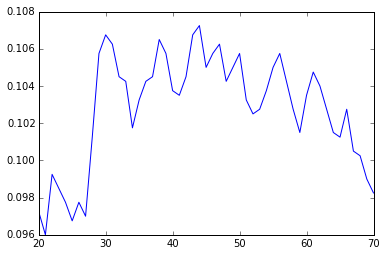

In [394]:
plt.plot(iters,svm_train_all_errors)
plt.show()

# Average Weight

In [395]:
### Partial Concept Drift 

####### Initialization ##########
#tasks = digits.create_mtl_datasets(Z, train_y, nTasks=100, taskSize=20, testSize=40)
#xs,ys,dy,ss,test_xs,test_ys,test_dy,test_ts = digits.generate_data(tasks)
xs = []
ys = []
dy = []
ss = []
k = 20
k_svm = 10
train_iter = 2

In [396]:
## strategy: average-weight
oracle_average_weight_errors = []
oracle_average_weight = lg.LgSegmentModel(xs,ys,ss,'train-all',k) 
svm_average_weight = lg.UserDefineModel(xs,ys,dy,ss,'train-all') # using the default value 
test_xs,test_ys,test_ss = digits.generate_additional_data (tasks, oracle_average_weight, svm_average_weight,3)
"""
for j in range(train_iter):
    oracle_average_weight.train_all_fs()
    oracle_average_weight.train_ws()
oracle_average_weight.strategy = 'average-weight'    
"""
svm_average_weight.train_all_fs()
svm_average_weight.train_ws()
svm_average_weight_errors = []
svm_average_weight.strategy = 'average-weight'
"""
oracle_err = lg.seg_model_error_01(oracle_average_weight, test_xs, test_ys, test_ss, num=20)
oracle_retrain_new_errors.append(oracle_err)
"""
svm_err = lg.seg_model_error_01(svm_average_weight,test_xs,test_ys,test_ss)
svm_average_weight_errors.append(svm_err)
#print "Initial Error OracleMTL---Train All: %f" % oracle_err
print 'Initial Error SVM_mtl---Train All: ', svm_err


TOTALS: fit time: 9.675183
start training ws!
ws: feature_time (s): 0.044744, train_time (s): 0.025598
Initial Error SVM_mtl---Train All:  0.09725


In [397]:
svm_average_weight.xs += svm_retrain_new.xs[2000:]
svm_average_weight.ys += svm_retrain_new.ys[2000:]
svm_average_weight.ss += svm_retrain_new.ss[2000:]
svm_average_weight.digitys += svm_retrain_new.digitys[2000:]
segment = svm_average_weight.segments
seg = svm_retrain_new.segments
for s in segment:
    segment[s].xs += seg[s].xs[20:]
    segment[s].ys += seg[s].ys[20:]
    segment[s].pref = seg[s].pref

In [234]:
test_xss,test_yss,test_tss = digits.generate_data_concept_drift(Z, train_y, oracle_average_weight,svm_average_weight,'partial')

In [235]:
test_xss1,test_yss1,test_tss1 = digits.generate_data_concept_drift(Z, train_y, oracle_average_weight,svm_average_weight,'partial')

In [398]:
for i in range(50):
    i+=20
    print '# of points is ', i
    svm_average_weight.train_ws(i)
    if i<45:
        svm_err = lg.seg_model_error_01(svm_average_weight,test_xss,test_yss,test_tss)
    else:
        svm_err = lg.seg_model_error_01(svm_average_weight,test_xss1,test_yss1,test_tss1)
    print svm_err
    svm_average_weight_errors.append(svm_err)

points is i 20
start training ws!
ws: feature_time (s): 0.201141, train_time (s): 0.043417
0.096
points is i 21
start training ws!
ws: feature_time (s): 0.200181, train_time (s): 0.046603
0.09725
points is i 22
start training ws!
ws: feature_time (s): 0.185905, train_time (s): 0.041949
0.10025
points is i 23
start training ws!
ws: feature_time (s): 0.176851, train_time (s): 0.038481
0.1045
points is i 24
start training ws!
ws: feature_time (s): 0.185529, train_time (s): 0.039189
0.104
points is i 25
start training ws!
ws: feature_time (s): 0.177550, train_time (s): 0.040445
0.1055
points is i 26
start training ws!
ws: feature_time (s): 0.183245, train_time (s): 0.042208
0.108
points is i 27
start training ws!
ws: feature_time (s): 0.195307, train_time (s): 0.041869
0.10925
points is i 28
start training ws!
ws: feature_time (s): 0.184652, train_time (s): 0.039267
0.113
points is i 29
start training ws!
ws: feature_time (s): 0.191429, train_time (s): 0.041052
0.11675
points is i 30
start

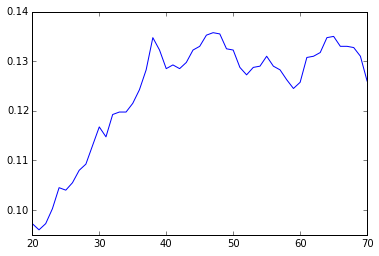

In [399]:
plt.plot(iters,svm_average_weight_errors)
plt.show()

In [230]:
svm_average_weight.train_ws(30)

start training ws!
ws: feature_time (s): 0.218509, train_time (s): 0.053800


# Last Point

In [400]:
### Partial Concept Drift 

####### Initialization ##########
#tasks = digits.create_mtl_datasets(Z, train_y, nTasks=100, taskSize=20, testSize=40)
#xs,ys,dy,ss,test_xs,test_ys,test_dy,test_ts = digits.generate_data(tasks)
xs = []
ys = []
dy = []
ss = []
k = 20
k_svm = 10
train_iter = 2

In [401]:
## strategy: last-point
oracle_last_point_errors = []
oracle_last_point = lg.LgSegmentModel(xs,ys,ss,'train-all',k)
svm_last_point = lg.UserDefineModel(xs,ys,dy,ss,'train-all') # using the default value 
test_xs,test_ys,test_ss = digits.generate_additional_data (tasks, oracle_last_point, svm_last_point,3)
print len(test_ss)
"""
for j in range(train_iter):
    oracle_last_point.train_all_fs()
    oracle_last_point.train_ws()
oracle_last_point.strategy = 'last-point'    
"""
svm_last_point.train_all_fs()
svm_last_point.train_ws()
svm_last_point_errors = []
svm_last_point.strategy = 'last-point'

"""
oracle_err = lg.seg_model_error_01(oracle_last_point, test_xs, test_ys, test_ss, num=20)
oracle_retrain_new_errors.append(oracle_err)
"""
svm_err = lg.seg_model_error_01(svm_last_point,test_xs,test_ys,test_ss)
svm_last_point_errors.append(svm_err)
#print "Initial Error OracleMTL---Train All: %f" % oracle_err
print 'Initial Error SVM_mtl---Train All: ', svm_err

4000
TOTALS: fit time: 9.301565
start training ws!
ws: feature_time (s): 0.045769, train_time (s): 0.025986
Initial Error SVM_mtl---Train All:  0.09725


In [402]:
svm_last_point.xs += svm_retrain_new.xs[2000:]
svm_last_point.ys += svm_retrain_new.ys[2000:]
svm_last_point.ss += svm_retrain_new.ss[2000:]
svm_last_point.digitys += svm_retrain_new.digitys[2000:]
segment = svm_last_point.segments
seg = svm_retrain_new.segments
for s in segment:
    segment[s].xs += seg[s].xs[20:]
    segment[s].ys += seg[s].ys[20:]
    segment[s].pref = seg[s].pref

In [211]:
test_xss,test_yss,test_tss = digits.generate_data_concept_drift(Z, train_y, oracle_last_point,svm_last_point,'partial')

In [212]:
test_xss1,test_yss1,test_tss1 = digits.generate_data_concept_drift(Z, train_y, oracle_last_point,svm_last_point,'partial')

In [403]:
for i in range(50):
    i+=20
    print 'points is i', i
    svm_last_point.train_ws(i)
    if i<45:
        svm_err = lg.seg_model_error_01(svm_last_point,test_xss,test_yss,test_tss)
    else:
        svm_err = lg.seg_model_error_01(svm_last_point,test_xss1,test_yss1,test_tss1)
    print svm_err
    svm_last_point_errors.append(svm_err)

points is i 20
start training ws!
ws: feature_time (s): 0.181730, train_time (s): 0.004314
0.1525
points is i 21
start training ws!
ws: feature_time (s): 0.180657, train_time (s): 0.004806
0.1605
points is i 22
start training ws!
ws: feature_time (s): 0.173987, train_time (s): 0.003580
0.1785
points is i 23
start training ws!
ws: feature_time (s): 0.197334, train_time (s): 0.005197
0.19925
points is i 24
start training ws!
ws: feature_time (s): 0.172641, train_time (s): 0.003988
0.213
points is i 25
start training ws!
ws: feature_time (s): 0.179014, train_time (s): 0.005083
0.21575
points is i 26
start training ws!
ws: feature_time (s): 0.250161, train_time (s): 0.005138
0.22325
points is i 27
start training ws!
ws: feature_time (s): 0.186051, train_time (s): 0.004261
0.22375
points is i 28
start training ws!
ws: feature_time (s): 0.173750, train_time (s): 0.003852
0.24475
points is i 29
start training ws!
ws: feature_time (s): 0.180186, train_time (s): 0.004390
0.23025
points is i 30


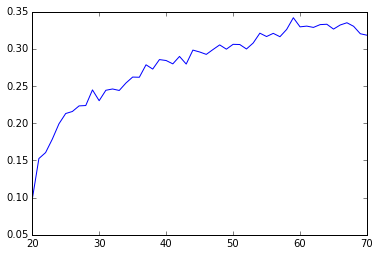

In [404]:
plt.plot(iters,svm_last_point_errors)
plt.show()

In [207]:
test_y = test_yss + test_yss1
test_x = test_xss + test_xss1
test_t = test_tss + test_tss1
svm_err = lg.seg_model_error_01(svm_last_point,test_xss,test_yss,test_tss)
print svm_err

0.30525


In [214]:
svm_last_point.segments[0].ws

array([ -73.26229593,  -38.74546957, -159.86351126,  -78.36026822,
        -31.00441489, -152.5344289 , -119.29978424,  -71.61610208,
        -58.61061959,  -21.36368386])

In [208]:
svm_last_point.segments[0].ws

array([ 13224.15503567,   8740.38368727,  -2459.64908903,  33445.90224465,
        15663.45542369,  15577.57763764,  19718.17634   ,   5538.95911512,
         2685.1676557 ,   6869.42426949])

# Gradient Step

In [405]:
### Partial Concept Drift 

####### Initialization ##########
#tasks = digits.create_mtl_datasets(Z, train_y, nTasks=100, taskSize=20, testSize=40)
#xs,ys,dy,ss,test_xs,test_ys,test_dy,test_ts = digits.generate_data(tasks)
xs = []
ys = []
dy = []
ss = []
k = 20
k_svm = 10
train_iter = 2

In [406]:
## strategy: Gradient-step
oracle_gradient_step_errors = []
oracle_gradient_step = lg.LgSegmentModel(xs,ys,ss,'train-all',k)
svm_gradient_step = lg.UserDefineModel(xs,ys,dy,ss,'train-all') # using the default value 
test_xs,test_ys,test_ss = digits.generate_additional_data (tasks, oracle_gradient_step, svm_gradient_step,3)
"""
for j in range(train_iter):
    oracle_gradient_step.train_all_fs()
    oracle_gradient_step.train_ws()
oracle_gradient_step.strategy = 'Gradient-step'    
"""

svm_gradient_step.train_all_fs()
svm_gradient_step.train_ws()
svm_gradient_step_errors = []
svm_gradient_step.strategy = 'Gradient-step'

"""
oracle_err = lg.seg_model_error_01(oracle_gradient_step, test_xs, test_ys, test_ss, num=20)
oracle_retrain_new_errors.append(oracle_err)
"""
svm_err = lg.seg_model_error_01(svm_gradient_step,test_xs,test_ys,test_ss)
svm_gradient_step_errors.append(svm_err)
#print "Initial Error OracleMTL---Train All: %f" % oracle_err
print 'Initial Error SVM_mtl---Train All: ', svm_err


TOTALS: fit time: 10.321076
start training ws!
ws: feature_time (s): 0.057757, train_time (s): 0.030921
Initial Error SVM_mtl---Train All:  0.09725


In [407]:
svm_gradient_step.xs += svm_retrain_new.xs[2000:]
svm_gradient_step.ys += svm_retrain_new.ys[2000:]
svm_gradient_step.ss += svm_retrain_new.ss[2000:]
svm_gradient_step.digitys += svm_retrain_new.digitys[2000:]
segment = svm_gradient_step.segments
seg = svm_retrain_new.segments
for s in segment:
    segment[s].xs += seg[s].xs[20:]
    segment[s].ys += seg[s].ys[20:]
    segment[s].pref = seg[s].pref

In [88]:
test_xss,test_yss,test_tss = digits.generate_data_concept_drift(Z, train_y, oracle_gradient_step,svm_gradient_step,'partial')

In [158]:
test_xss1,test_yss1,test_tss1 = digits.generate_data_concept_drift(Z, train_y, oracle_gradient_step,svm_gradient_step,'partial')

In [408]:
for i in range(50):
    i+=20
    print '# of points is ', i
    #print svm_gradient_step.segments[0].ws
    svm_gradient_step.train_ws(i)
    if i <45:
        svm_err = lg.seg_model_error_01(svm_gradient_step,test_xss,test_yss,test_tss)
    else:
        svm_err = lg.seg_model_error_01(svm_gradient_step,test_xss1,test_yss1,test_tss1)
    print svm_err
    svm_gradient_step_errors.append(svm_err)

# of points is  20
start training ws!
ws: feature_time (s): 0.176931, train_time (s): 0.006017
0.1015
# of points is  21
start training ws!
ws: feature_time (s): 0.176042, train_time (s): 0.005605
0.1045
# of points is  22
start training ws!
ws: feature_time (s): 0.175147, train_time (s): 0.005800
0.1075
# of points is  23
start training ws!
ws: feature_time (s): 0.171444, train_time (s): 0.005656
0.10975
# of points is  24
start training ws!
ws: feature_time (s): 0.186417, train_time (s): 0.006242
0.1115
# of points is  25
start training ws!
ws: feature_time (s): 0.196894, train_time (s): 0.006149
0.1145
# of points is  26
start training ws!
ws: feature_time (s): 0.174335, train_time (s): 0.005698
0.11775
# of points is  27
start training ws!
ws: feature_time (s): 0.175351, train_time (s): 0.005790
0.1195
# of points is  28
start training ws!
ws: feature_time (s): 0.221249, train_time (s): 0.009387
0.1225
# of points is  29
start training ws!
ws: feature_time (s): 0.183111, train_time

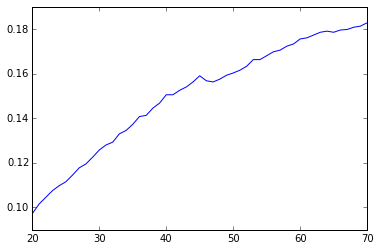

In [409]:
plt.plot(iters,svm_gradient_step_errors)
plt.show()

# No Retrain

In [410]:
xs = []
ys = []
dy = []
ss = []
k = 20
k_svm = 10
train_iter = 2


In [411]:
oracle_no_retrain_errors = []
oracle_no_retrain = lg.LgSegmentModel(xs,ys,ss,'train-all',k)
svm_no_retrain = lg.UserDefineModel(xs,ys,dy,ss,'train-all') # using the default value 
test_xs,test_ys,test_ss = digits.generate_additional_data (tasks, oracle_no_retrain, svm_no_retrain,3)
"""
for j in range(train_iter):
    oracle_gradient_step.train_all_fs()
    oracle_gradient_step.train_ws()
oracle_gradient_step.strategy = 'Gradient-step'    
"""

svm_no_retrain.train_all_fs()
svm_no_retrain.train_ws()
svm_no_retrain_errors = []


"""
oracle_err = lg.seg_model_error_01(oracle_gradient_step, test_xs, test_ys, test_ss, num=20)
oracle_retrain_new_errors.append(oracle_err)
"""
svm_err = lg.seg_model_error_01(svm_no_retrain,test_xs,test_ys,test_ss)
svm_no_retrain_errors.append(svm_err)
#print "Initial Error OracleMTL---Train All: %f" % oracle_err
print 'Initial Error SVM_mtl---Train All: ', svm_err

TOTALS: fit time: 9.748455
start training ws!
ws: feature_time (s): 0.065432, train_time (s): 0.035191
Initial Error SVM_mtl---Train All:  0.09725


In [412]:
svm_no_retrain.xs += svm_retrain_new.xs[2000:]
svm_no_retrain.ys += svm_retrain_new.ys[2000:]
svm_no_retrain.ss += svm_retrain_new.ss[2000:]
svm_no_retrain.digitys += svm_retrain_new.digitys[2000:]
segment = svm_no_retrain.segments
seg = svm_retrain_new.segments
for s in segment:
    segment[s].xs += seg[s].xs[20:]
    segment[s].ys += seg[s].ys[20:]
    segment[s].pref = seg[s].pref

In [413]:
for i in range(50):
    i+=20
    print '# of points is ', i
    #print svm_gradient_step.segments[0].ws
    #svm_gradient_step.train_ws(i)
    if i <45:
        svm_err = lg.seg_model_error_01(svm_no_retrain,test_xss,test_yss,test_tss)
    else:
        svm_err = lg.seg_model_error_01(svm_no_retrain,test_xss1,test_yss1,test_tss1)
    print svm_err
    svm_no_retrain_errors.append(svm_err)

# of points is  20
0.096
# of points is  21
0.096
# of points is  22
0.096
# of points is  23
0.096
# of points is  24
0.096
# of points is  25
0.096
# of points is  26
0.096
# of points is  27
0.096
# of points is  28
0.096
# of points is  29
0.096
# of points is  30
0.096
# of points is  31
0.096
# of points is  32
0.096
# of points is  33
0.096
# of points is  34
0.096
# of points is  35
0.096
# of points is  36
0.096
# of points is  37
0.096
# of points is  38
0.096
# of points is  39
0.096
# of points is  40
0.096
# of points is  41
0.096
# of points is  42
0.096
# of points is  43
0.096
# of points is  44
0.096
# of points is  45
0.0925
# of points is  46
0.0925
# of points is  47
0.0925
# of points is  48
0.0925
# of points is  49
0.0925
# of points is  50
0.0925
# of points is  51
0.0925
# of points is  52
0.0925
# of points is  53
0.0925
# of points is  54
0.0925
# of points is  55
0.0925
# of points is  56
0.0925
# of points is  57
0.0925
# of points is  58
0.0925
# of points

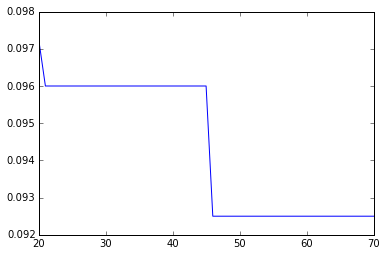

In [414]:
plt.plot(iters,svm_no_retrain_errors)
plt.show()